# **12. Geometric Transformations**

Geometric transformations modify the spatial arrangement of pixels in an image. They are fundamental in computer vision for aligning, registering, or augmenting images.

### **1. Translation, Rotation, Scaling**
  - Translation shifts the image in x and y directions.
  - Rotation turns the image around a pivot (usually the center).
   - Scaling resizes the image along x and y axes.
    
### **2. Affine Transformation**
  * Preserves lines and parallelism, but not necessarily angles or lengths.
  * Defined by 6 parameters mapping (x, y) to (x', y').
  * Useful for rotation, translation, scaling combined in one operation.

### **3. Perspective Warp (Homography)**
  * Maps a quadrilateral in the source image to another quadrilateral in the target.
  * Allows simulation of 3D viewpoint changes, like top-down or oblique views.

### **4. Image Alignment / Registration**
  * Matches points/features between two images to overlay them accurately.
  * Used in stitching panoramas, medical imaging, or tracking.

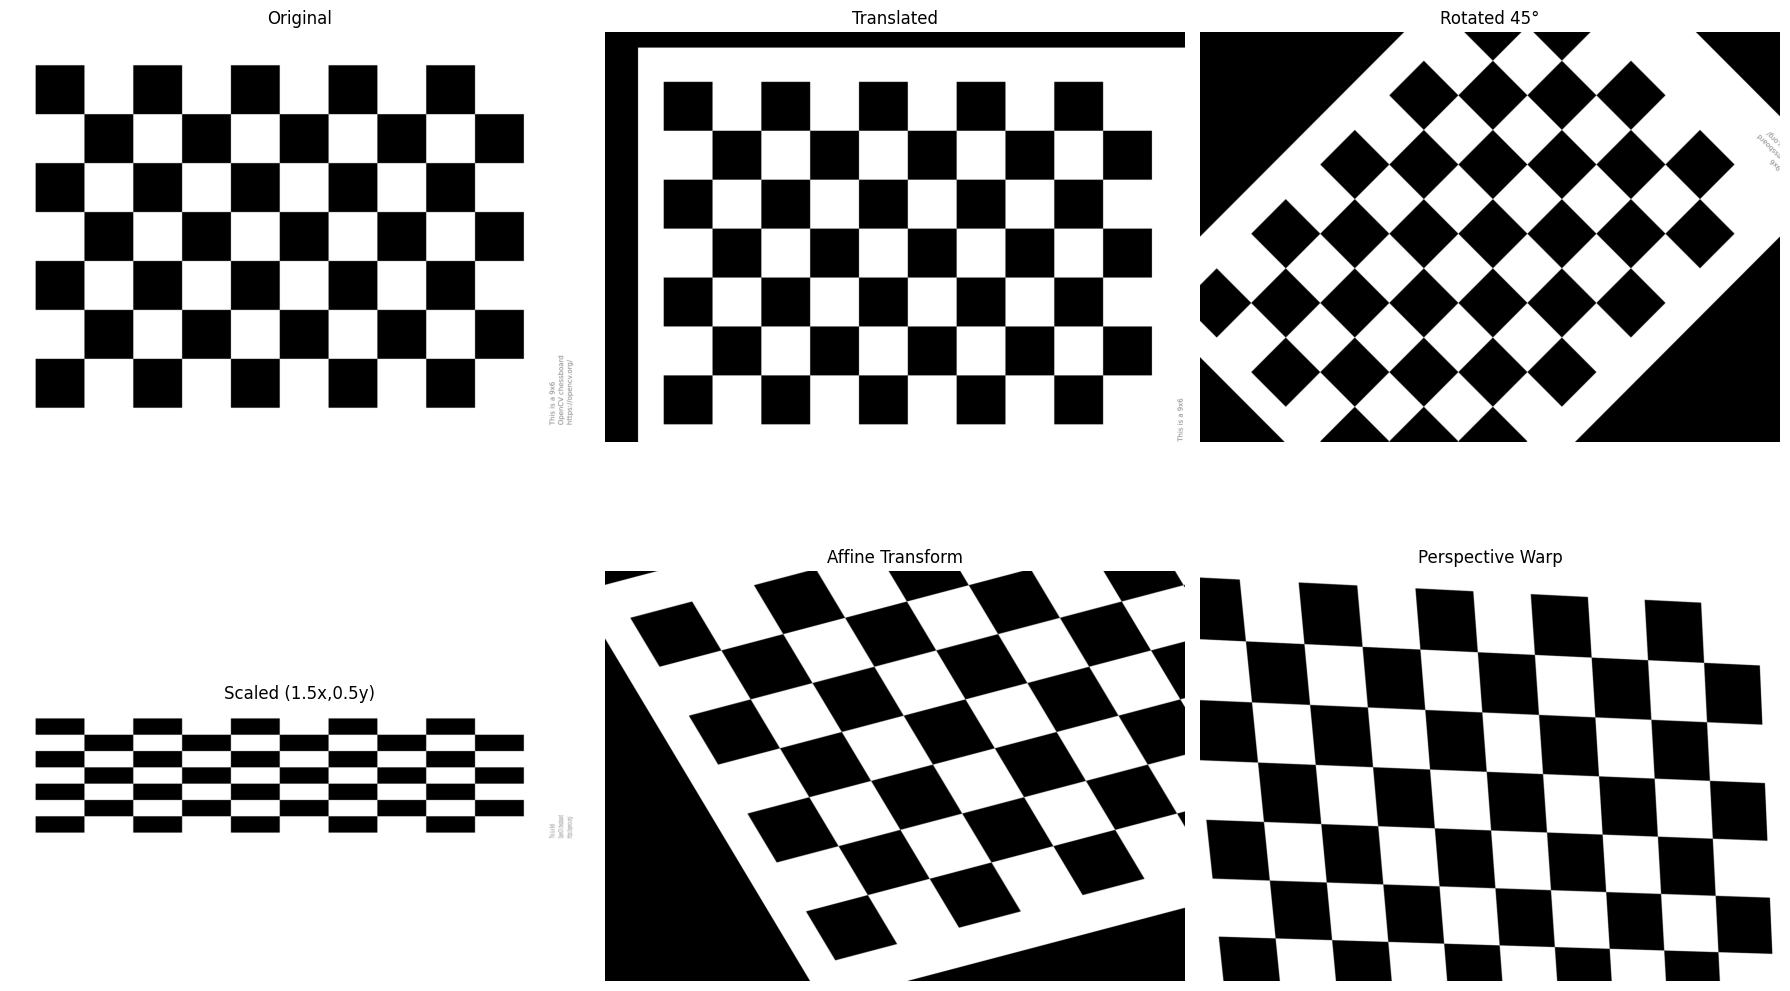

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, color
import cv2

# --- Load image ---
image = io.imread('chessboard.png')
if image.shape[2] == 4:  # drop alpha
    image = image[:, :, :3]

H, W = image.shape[:2]

# --- 1. Translation ---
tx, ty = 100, 50  # shift right 100 px, down 50 px
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated = cv2.warpAffine(image, translation_matrix, (W, H))

# --- 2. Rotation ---
angle = 45  # degrees
center = (W//2, H//2)
rot_matrix = cv2.getRotationMatrix2D(center, angle, 1)  # scale=1
rotated = cv2.warpAffine(image, rot_matrix, (W, H))

# --- 3. Scaling ---
scale_x, scale_y = 1.5, 0.5
scaled = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

# --- 4. Affine Transformation ---
pts1 = np.float32([[50,50],[200,50],[50,200]])  # source points
pts2 = np.float32([[10,100],[200,50],[100,250]])  # destination points
affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_transformed = cv2.warpAffine(image, affine_matrix, (W, H))

# --- 5. Perspective Warp ---
pts1 = np.float32([[50,50], [W-50,50], [50,H-50], [W-50,H-50]])
pts2 = np.float32([[-100, -50], [W+100, 50], [50, H+100], [W+150, H+150]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_transformed = cv2.warpPerspective(image, perspective_matrix, (W, H))

# --- Display all transformations ---
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].imshow(image)
axes[0,0].set_title("Original")
axes[0,0].axis('off')

axes[0,1].imshow(translated)
axes[0,1].set_title("Translated")
axes[0,1].axis('off')

axes[0,2].imshow(rotated)
axes[0,2].set_title("Rotated 45°")
axes[0,2].axis('off')

axes[1,0].imshow(scaled)
axes[1,0].set_title("Scaled (1.5x,0.5y)")
axes[1,0].axis('off')

axes[1,1].imshow(affine_transformed)
axes[1,1].set_title("Affine Transform")
axes[1,1].axis('off')

axes[1,2].imshow(perspective_transformed)
axes[1,2].set_title("Perspective Warp")
axes[1,2].axis('off')

plt.tight_layout()
plt.show()
